In [83]:
import pandas as pd
import networkx as nx
import pylab as plt
import numpy as np

## Google+ Social Circle Data
*https://snap.stanford.edu/data/egonets-Gplus.html*

### Descriptions of the files included gplus.tar.gz

**nodeId.edges:** The edges in the ego network for the node 'nodeId'. Edges are undirected for facebook, and directed (a follows b) for twitter and gplus. The 'ego' node does not appear, but it is assumed that they follow every node id that appears in this file.

**nodeId.circles:** The set of circles for the ego node. Each line contains one circle, consisting of a series of node ids. The first entry in each line is the name of the circle.

**nodeId.feat:** The features for each of the nodes that appears in the edge file.

**nodeId.egofeat:** The features for the ego user.

**nodeId.featnames:** The names of each of the feature dimensions. Features are '1' if the user has this property in their profile, and '0' otherwise. This file has been anonymized for facebook users, since the names of the features would reveal private data.

### Read in the gplus data 
-  The raw data file contains the unique combination of edges and nodes connections for the above files. Source file: **gplus_combined.txt.gz**.	*Edges from all egonets combined*


In [41]:
#read in the consolidated gplus_combined.txt.gz	Edges from all egonets combined
initial_df = pd.read_table(r'C:\Users\burke\OneDrive\Desktop\Data 620\gplus_combined.csv', sep=' ',header = None, error_bad_lines=False).drop_duplicates()
initial_df.rename(columns = {0 : 'Nodes_1', 1 : 'Nodes_2'}, inplace = True)
initial_df['Edges'] = range(1, len(initial_df) +1)
initial_df['Edges']= initial_df['Edges'].astype(str)

### Data Summary

In [42]:
initial_df.describe()

,Nodes_1,Nodes_2,Edges
count,13673453,13673453,13673453
unique,72271,107596,13673453
top,106228758905254036967,111091089527727420853,10995085
freq,5056,17055,1


### Filter for a subset of nodes 
-  Data is too large- I decided to take a subset for the first analysis
-  Filtered the initial_df for the first 10 nodes under 'Nodes_1'

In [43]:
filter_df = pd.DataFrame(initial_df['Nodes_1'].unique()).head(10)
subset = initial_df.loc[initial_df['Nodes_1'].isin(filter_df[0])]
subset.describe()

,Nodes_1,Nodes_2,Edges
count,7412,7412,7412
unique,10,4302,7412
top,116407635616074189669,116805285176805120365,398013
freq,1688,9,1


### Load the data into Networkx


In [44]:
test = nx.from_pandas_dataframe(subset , 'Nodes_1','Nodes_2', edge_attr = 'Edges')

In [45]:
print "Nodes:", test.number_of_nodes()
print "Edges:", test.number_of_edges()

Nodes: 4302
Edges: 7403


In [ ]:
# Calculating the diameter of the graph using the built in NetworkX function.
nx.diameter(test)

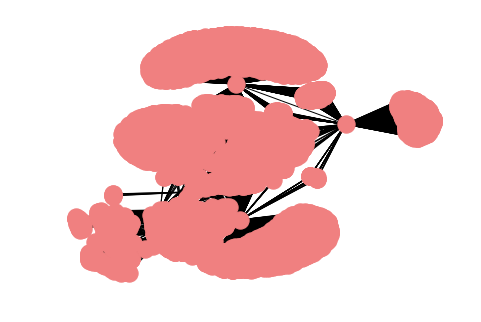

In [47]:
# draw the network# draw test 
%matplotlib inline
nx.draw(test, node_color = 'green') 

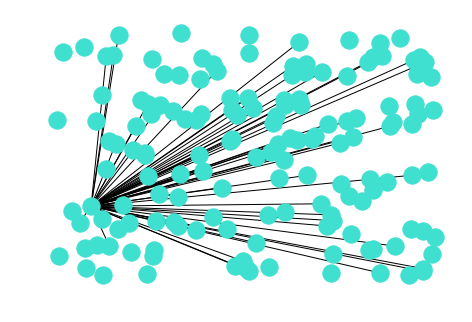

In [76]:
#Create small subgraph (first 150 nodes) just for graphing demo
test_sub =test.subgraph(subset['Nodes_2'].unique().tolist()[:150])
nx.draw_random(test_sub, node_color ='turquoise')

In [122]:
# Degree centrality (valency) of a node of a graph:
# the fraction of nodes a node v is connected to
degree_values =[]
for d in test.degree():
    degree_values.append(d)
degree_centrality =pd.DataFrame(degree_values)
degree_centrality.rename(columns ={0:'Nodes', 1: 'Connection_Num'}, inplace = True)

In [127]:
degree_centrality.sort_values(['Connection_Num'], ascending= False).head(10)

,Nodes,Connection_Num
545,116407635616074189669,1688
690,116374117927631468606,1472
3450,105706178492556563330,1259
3680,112188647432305746617,616
2348,108736646334864181044,562
3032,107527001343993112621,548
1640,117421021456205115327,463
159,116719211656774388392,395
4207,108683283643126638695,281
4082,105513412023818293063,138
